## 線形回帰の雛形モデルに問題ごとの作成コードを追加、上書きをしてスクラッチを完成させる

# 【問題1】仮定関数

$$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\
$$
は
$$
h_\theta(x) = \theta^T \cdot x.
$$

In [92]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    Returns
    -------
     次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果
    """
    X_ = np.ones(X.shape[0])
    X_=X_.reshape(X.shape[0], 1)
    X = np.hstack([X_ ,X])
    self.Theta = np.random.random_sample((X.shape[1]+1, 1))
    self.y_ = self.Theta @ X.T
    return self.y_

# 【問題2】最急降下法

## 最急降下法により学習させる実装を行なってください

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$


In [93]:
def _gradient_descent(self,X,error):
    """
    説明を記述
    引数
    ---
    X:  
    error: y^ - y
    """
    
    self.Theta = self.Theta - 0.5 * ((self.error * X).sum()) / x.shape[0]
    return self.Theta

### 損失関数（目的関数）

$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

# 【問題3】推定

## 推定する仕組みを実装してください

In [94]:
def predict(self, X):

    """
    線形回帰を使い推定する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル
    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """
    pred_y = X @ self.Theta

    pass
    return pred_y

# 【問題4】平均二乗誤差

## 線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください

1. 推定結果を計算

$$
h_\theta(x_i) = \theta^T \cdot x_i
$$

2. 実測値との差を計算【対応する数式の個所を書いてください】

$$
error_i = h_\theta(x_i) - y_i
$$

3. 1,2の2乗を計算

$$
squared error_i = error_i^2
$$

4. 3の合計値を計算【対応する数式の個所を書いてください】

$$
sum squared error = \sum_{i=1}^{m} squared error_i
$$

5. データの長さで割って4の平均値を計算

$$
mean squared error = \sum_{i=1}^{m} squared error_i
$$

In [95]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    #mse = ((y_pred - y) ** 2).sum() / X.shape[0]
    

    ER = ([])
    for i in range(X.shape[0]):
        ER = np.append(ER,(y_pred[i] - y[i])**2)
    mse = 1/X.shape[0]*ER.sum()


    
    #mse = (1/self.n_sample*np.sum((y_pred - y)**2))
    
    pass
    return mse


# 【問題5】目的関数

## 線形回帰の 目的関数（損失関数） を実装してください

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

In [96]:
def _loss_func(self,X,y):
    
    error = self.predict(X) - y
    return error   


# 【問題6】学習と推定

## House Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

In [97]:
import numpy as np
from numpy.random import *
import random

In [152]:
class ScratchLinearRegression:
    """
    線形回帰のスクラッチ実装
    
    パラメーター
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    属性
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        #self.verbose = verbose
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter + 1)
        
    def fit(self,X,y,X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        
        self.theta_list = np.zeros((self.iter +1,X.shape[1] + 1))
        self._linear_hypothesis(X)
        init_error = self._loss_func(X,y)
        self.loss[0] = np.sum(init_error**2)/(2*X.shape[0])
        init_val_error= self._loss_func(X_val,y_val)
        self.val_loss[0] = np.sum(init_val_error**2)/(2 * X_val.shape[0])
                                                      
        for n in range(self.iter):
            error = self._loss_func(X,y)
            loss = self._gradient_descent(X,error)
            self.theta_list[n] = self.theta
            self.loss[n] = loss
            val_error = self._loss_func(X_val,y_val)
            val_loss = np.sum(val_error**2) /(2*X_val.shape[0])
            self.val_loss[n + 1]=val_loss            
            
        pass
        return 
    
    #---------問１--------
    
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
         次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        self.theta = np.random.randn(X.shape[1])  # thetaを初期化

    # --------問２--------
    
    def _gradient_descent(self,X,error):
        """
        説明を記述
        引数
        ---
        X:  
        error: y^ - y
        """
        loss = np.sum(error**2) /(2 * X.shape[0])
        loss1 = np.dot(error.T,X)/X.shape[0]
        if self.bias:
            self.theta[:-1] =self.theta[:-1] - self.lr * loss1
            self.theta[-1] = self.theta[-1] - (self.lr * np.sum((error/X.shape[0])))
        else:
            self.theta = self.theta - self.lr * loss1
        return loss
                
    #--------問３--------
    
    def predict(self, X):

        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        ret_val = X @ self.theta

        pass
        return ret_val 

    

    #--------問５--------
    def _loss_func(self,X,y):
    
        error = self.predict(X) - y
        return error   


In [143]:
#--------問４--------
    
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    #mse = ((y_pred - y) ** 2).sum() / X.shape[0]

    ER = ([])
    for i in range(X.shape[0]):
        ER = np.append(ER,(y_pred[i] - y[i])**2)
    mse = 1/X.shape[0]*ER.sum()

    #mse = (1/X.shape[0])*np.sum((y_pred - y)**2))

    pass
    return mse

In [144]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import warnings #ワーニング関連のモジュール？
warnings.filterwarnings('ignore') #ワーニングが消える？

csv_path = "train.csv" # ファイル名（パス）を指定する

'''学習用データの読み込み'''
df = pd.read_csv("train_1.csv")

# 目的変数
y = df.loc[:,["SalePrice"]]

#説明変数
X = df.loc[:,["GrLivArea"]]#,"YearBuilt"]]

x = np.array(df.loc[:,'GrLivArea'])
y = np.array(df.loc[:,'SalePrice'])

In [161]:
# トレーニングデータ分割
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)
'''回帰モデルの作成'''
#モジュール読み込み、モデル構築
reg = ScratchLinearRegression(num_iter=1000, lr = 0.00001,bias=True, verbose=False)
#モデルの学習
reg.fit(x_train.reshape(-1,1),y_train,x_test.reshape(-1,1),y_test)
print(type(reg))
y_pred = reg.predict(x.reshape(-1,1))
print(y_pred)

<class '__main__.ScratchLinearRegression'>
[203168.25808849 149940.55070625 212197.95844798 ... 278019.72159478
 128079.17088854 149227.67962523]


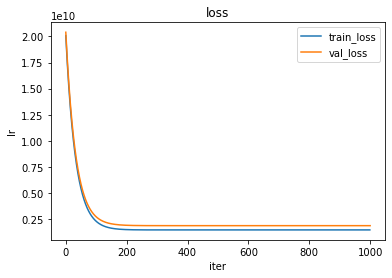

In [162]:
# グラフを表示する。タイトルと軸ラベル名付き。
plt.title("loss")
plt.xlabel("iter")
plt.ylabel("lr")
plt.plot(reg.loss,label = "train_loss") 
plt.plot(reg.val_loss,label = "val_loss")
plt.legend()
plt.show() 

# 【問題7】学習曲線のプロット

## 学習曲線を表示する関数を作成し、実行してください。

## 線形回帰の雛形